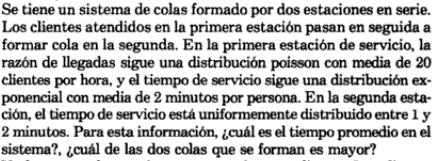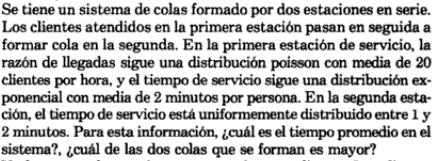

Se tiene un sistema de colas formado por dos estaiones en serie.
Los clientes atendidos en la primera estación pasan en seguida a formar cola en la segunda. En la primera estación de servicio, la razón de llegadas sigue una distribución Poisson con media de 20 clientes por hora, y el tiempo de servicio sigue una distribución exponencial con media de 2 minutos por persona. En la segunda estación, el tiempo de servicio está uniformemente distribuida entre 1 y 2 minutos. Para esta información, ¿Cuál es el tiempo promedio en el sistema?, ¿Cuál de las dos colas que se forman es mayor?.

Tenemos un sistema de colas con dos estaciones en serie:

* $\textbf{Primera estaci\'on:}$
  * Llegadas: Distribución de Poisson con media de 20 clientes por hora.
  * Servicio: Distribución exponencial con media de 2 minutos por persona.
* $\textbf{Segunda estaci\'on:}$
  * Servicio: Distribución uniforme entre 1 y 2 minutos por persona.
    
* $\textbf{\Large Paso 1: Convertir las tasas a las mismas unidades.}$
  * La tasa de llegada es $\lambda=20$ por hora.
  * Convertimos $\lambda$ a minutos $\lambda=\frac{20}{60}\approx 0.3333$ clientes por minuto.
  * La media del tiempo de servicio en la primera estación es 2 minutos, así que $\mu_{1}=0.5$.
  * El tiempo de servicio en la segunda estación es uniforme entre 1 y 2 minutos por lo que la media es $\frac{1+2}{2}=1.5$ minutos. Entonces $\mu_{2}=\frac{1}{1.5}\approx 0.667$ clientes por minuto.
    
* $\textbf{\Large Paso 2: Calcular la utilizaci\'on de cada estaci\'on.}$
  * Utilización de la primera estación, $\rho_{1}:$
    $$\rho_{1}=\frac{\lambda}{\mu_{1}} \approx 0.666 $$
  * Utilización de la segunda estación, $\rho_{2}:$
 
    $$\rho_{2}=\frac{\lambda}{\mu_{2}}\approx 0.5 $$

* $\textbf{\Large Paso 3: Calcular el n\'umero promedio de clientes.}$
  * Para la primera estación (M/M/1):
    $$L_{1}=\frac{\rho_{1}}{1-\rho_{1}}=\frac{0.666}{1-0.666}\approx 1.998$$
  * Para la segunda estación (M/D/1) dado que el tiempo de servicio es constante y uniforme.
 
    $$L_{2}=\frac{\rho_{2}}{1-\rho_{2}}=\frac{0.5}{1-0.5} = 1$$


* $\textbf{\Large Paso 4: Calcular el tiempo promedio en el sistema (W).}$
  * Primera estación (M/M/1):
    $$W_{1}=\frac{L_{1}}{\lambda}=\frac{1.998}{0.333} \approx 6 \quad minutos $$
    
  * Segunda estación (M/D/1):
    $$W_{2}=\frac{L_{2}}{\lambda}=\frac{1}{0.333} \approx 3 \quad minutos $$

  * Tiempo promedio total en el sistema:
    $$W= W_{1} + W_{2}=9 \quad minutos $$
 

* $\textbf{\Large Paso 5: Comparar las longitudes de las colas.}$
  
  * Longitud promedio de la cola en la primera estación (L_q1).
    $$L_q1 = L_{1} - \rho_{1} = 1.998 - 0.666 \approx 1.332  $$

  * Longitud promedio de la cola en la segunda estación (L_q2):
 
    $$L_q2 = L_{2} - \rho_{2} = 1 - 0.5 = 0.5  $$
    
Por lo que podemos concluir que:

*  El tiempo promedio en el sistema es de 9 minutos.
*  La cola en la primera estación es mayor, con una longitud promedio de aproximadamente 1.332 clientes, comparada con la cola en la segunda estación que tiene una longitud promedio de 0.5 clientes.


Esto de manera teorica, pero si simulamos el proceso.


In [2]:
import numpy as np
import pandas as pd

def generar_tiempos_llegada(lambda_, num_clientes):
    return np.cumsum(np.random.exponential(1/lambda_, num_clientes))

def generar_tiempos_servicio_estacion1(media_servicio, num_clientes):
    return np.random.exponential(media_servicio, num_clientes)

def generar_tiempos_servicio_estacion2(num_clientes):
    return np.random.uniform(1, 2, num_clientes)

def simular_colas(lambda_, num_clientes, media_servicio1):
    tiempos_llegada = generar_tiempos_llegada(lambda_, num_clientes)
    tiempos_servicio1 = generar_tiempos_servicio_estacion1(media_servicio1, num_clientes)
    tiempos_servicio2 = generar_tiempos_servicio_estacion2(num_clientes)

    tiempos_inicio_servicio1 = np.zeros(num_clientes)
    tiempos_terminacion_servicio1 = np.zeros(num_clientes)
    tiempos_inicio_servicio2 = np.zeros(num_clientes)
    tiempos_terminacion_servicio2 = np.zeros(num_clientes)

    longitud_cola1 = np.zeros(num_clientes)
    longitud_cola2 = np.zeros(num_clientes)

    for i in range(num_clientes):
        if i == 0:
            tiempos_inicio_servicio1[i] = tiempos_llegada[i]
        else:
            tiempos_inicio_servicio1[i] = max(tiempos_llegada[i], tiempos_terminacion_servicio1[i-1])

        tiempos_terminacion_servicio1[i] = tiempos_inicio_servicio1[i] + tiempos_servicio1[i]

        if i == 0:
            tiempos_inicio_servicio2[i] = tiempos_terminacion_servicio1[i]
        else:
            tiempos_inicio_servicio2[i] = max(tiempos_terminacion_servicio1[i], tiempos_terminacion_servicio2[i-1])

        tiempos_terminacion_servicio2[i] = tiempos_inicio_servicio2[i] + tiempos_servicio2[i]

        if tiempos_llegada[i] < tiempos_terminacion_servicio1[i-1]:
            longitud_cola1[i] = longitud_cola1[i-1] + 1
        else:
            longitud_cola1[i] = max(0, longitud_cola1[i-1] - 1)

        if tiempos_terminacion_servicio1[i] < tiempos_terminacion_servicio2[i-1]:
            longitud_cola2[i] = longitud_cola2[i-1] + 1
        else:
            longitud_cola2[i] = max(0, longitud_cola2[i-1] - 1)

    resultados = {
        'Tiempo de llegada': tiempos_llegada,
        'Inicio servicio 1': tiempos_inicio_servicio1,
        'Fin servicio 1': tiempos_terminacion_servicio1,
        'Inicio servicio 2': tiempos_inicio_servicio2,
        'Fin servicio 2': tiempos_terminacion_servicio2,
        'Longitud cola 1': longitud_cola1,
        'Longitud cola 2': longitud_cola2
    }

    return pd.DataFrame(resultados)



In [5]:
# Parámetros del problema
lambda_ = 20 / 60  # tasa de llegada en clientes por minuto
num_clientes = 100  # número de clientes a simular
media_servicio1 = 2  # media del tiempo de servicio en la primera estación en minutos

# Simular el sistema de colas
resultados_simulacion = simular_colas(lambda_, num_clientes, media_servicio1)

# Calcular métricas promedio
tiempo_promedio_sistema = (resultados_simulacion['Fin servicio 2'] - resultados_simulacion['Tiempo de llegada']).mean()
longitud_promedio_cola1 = resultados_simulacion['Longitud cola 1'].mean()
longitud_promedio_cola2 = resultados_simulacion['Longitud cola 2'].mean()

print(f"Tiempo promedio en el sistema: {tiempo_promedio_sistema:.2f} minutos")
print(f"Longitud promedio de la cola en la primera estación: {longitud_promedio_cola1:.2f}")
print(f"Longitud promedio de la cola en la segunda estación: {longitud_promedio_cola2:.2f}")

# Mostrar los primeros 10 resultados
print(resultados_simulacion.head(10))


Tiempo promedio en el sistema: 5.97 minutos
Longitud promedio de la cola en la primera estación: 9.40
Longitud promedio de la cola en la segunda estación: 5.75
   Tiempo de llegada  Inicio servicio 1  Fin servicio 1  Inicio servicio 2  \
0           3.679990           3.679990        3.713760           3.713760   
1           4.629122           4.629122        6.679854           6.679854   
2           5.021021           6.679854       11.996366          11.996366   
3           5.548889          11.996366       12.382301          13.804772   
4           8.386899          12.382301       12.713911          15.147189   
5           9.763455          12.713911       13.422482          16.205818   
6          10.796805          13.422482       15.430438          17.792867   
7          15.174955          15.430438       15.994425          18.836528   
8          19.519887          19.519887       24.963235          24.963235   
9          19.625732          24.963235       26.079463     

Podemos notar que los resultados se aproximan a los datos teoricos y confirma que la cola 1 tarda mas